In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Gray image')

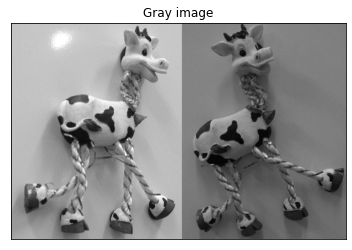

In [225]:
img1=cv.imread('Downloads\horse.jpg')
img_RGB=cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img_1=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
plt.imshow(img_1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("Gray image")

In [203]:
print(img_1.shape[0])
print(img_1.shape[1])

571
883


In [231]:
#Corner detection in Harris methord through basics
img_1=np.float64(img_1)
x_grad_1=cv.Sobel(img_1,cv.CV_16S,1,0)
x_grad_1_sqrt=np.square(x_grad_1)
y_grad_1=cv.Sobel(img_1,cv.CV_16S,0,1)
y_grad_1_sqrt=np.square(y_grad_1)
xy1_int=np.multiply(x_grad_1,y_grad_1)
x_grad_2=cv.Sobel(img_2,cv.CV_16S,1,0)
x_grad_2_sqrt=np.square(x_grad_2)
y_grad_2=cv.Sobel(img_2,cv.CV_16S,0,1)
y_grad_2_sqrt=np.square(y_grad_2)
xy2_int=np.multiply(x_grad_2,y_grad_2)


In [205]:
x_sqrt_gaus_1=cv.GaussianBlur(x_grad_1_sqrt,(3,3),2,0)
y_sqrt_gaus_1=cv.GaussianBlur(y_grad_1_sqrt,(3,3),2,0)
xy_sqrt_gaus_1=cv.GaussianBlur(xy1_int,(3,3),2,0)
R=np.zeros((571,883))
for k in range(571):
    for i in range(883):
            m=np.array([[x_sqrt_gaus_1[k][i],xy_sqrt_gaus_1[k][i]],[xy_sqrt_gaus_1[k][i],y_sqrt_gaus_1[k][i]]],dtype=np.float64)
            R[k,i]=np.linalg.det(m)-0.04*np.power(np.trace(m),2)
Rmax=R.max()

Text(0.5, 1.0, 'R response')

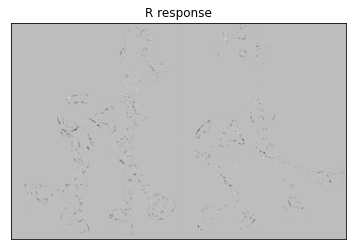

In [206]:
plt.imshow(R,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("R response")

Text(0.5, 1.0, 'Thresholding with 0.1*Rmax')

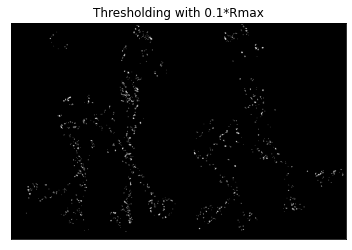

In [227]:
T=np.zeros((571,883))
for k in range(571):
    for i in range(883):
        if (R[k,i]>0.1*Rmax):
            T[k,i]=255
plt.imshow(T,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("Thresholding with 0.1*Rmax")

Text(0.5, 1.0, 'Detected corners')

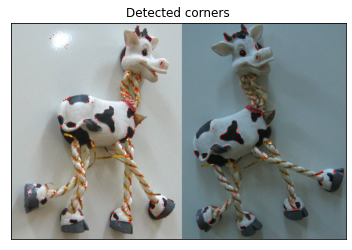

In [228]:
Tp=cv.copyMakeBorder(T,1,1,1,1,cv.BORDER_REFLECT_101)
for k in range(1,572):
    for i in range(1,884):
        l=Tp[k-1:k+2,i-1:i+2]
        if (l.max()==255):
            ind=(l==l.max())
            if (ind[1,1]==True):
                img_RGB[k-1,i-1]=[255,0,0]
        
plt.imshow(img_RGB)
plt.xticks([]),plt.yticks([])
plt.title("Detected corners")


Text(0.5, 1.0, 'Harris Responce')

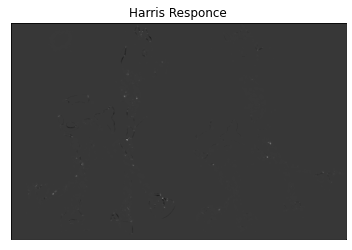

In [232]:
#Harris corner detection through cv.cornerHarris function
img=np.float32(img_1)
img_RGB_1=cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(cv.cornerHarris(img,3,3,0.04),cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("Harris Responce")

Text(0.5, 1.0, 'Detected Corners')

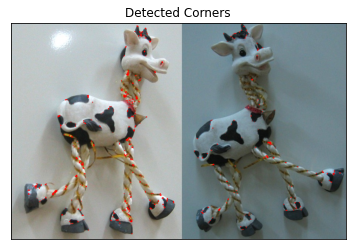

In [233]:
dst=cv.cornerHarris(img,3,3,0.04)
bool_ind=(dst>0.01*dst.max())
img_RGB_1[bool_ind]=[255,0,0]
plt.imshow(img_RGB_1)
plt.xticks([]),plt.yticks([])
plt.title("Detected Corners")